# Benchmarking Results

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

### 1. Load, Summarize, Insert

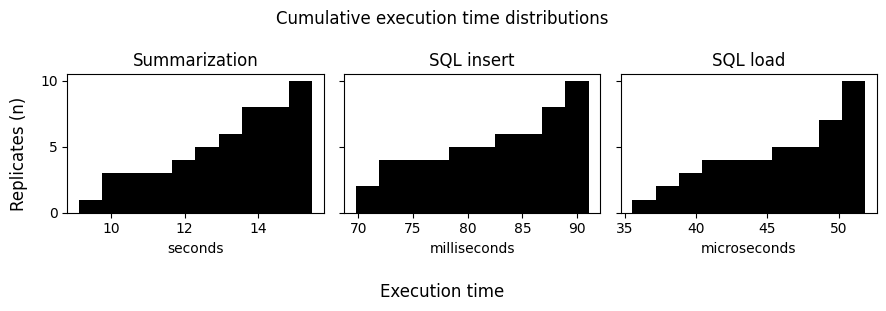

In [11]:
data = pd.read_csv('../benchmarks/load_summarize_insert/results.csv')

titles = ['Summarization', 'SQL insert', 'SQL load']
data_types = ['mean_summarization_time', 'mean_insert_time', 'mean_loading_time']
xlabels = ['seconds', 'milliseconds', 'microseconds']
xaxis_scales = [1, 10**3, 10**6]

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True, tight_layout=True)

fig.suptitle('Cumulative execution time distributions')
fig.supxlabel('Execution time')
fig.supylabel('Replicates (n)')

axs_num = 0

for title, data_type, xlabel, xaxis_scale in zip(titles, data_types, xlabels, xaxis_scales):

    axs[axs_num].set_title(title)
    axs[axs_num].set_xlabel(xlabel)
    axs[axs_num].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    axs[axs_num].hist(
        data[data_type] * xaxis_scale,
        histtype="stepfilled", 
        cumulative=1,
        color='black'
    )

    axs_num += 1

plt.show()

### 2. Huggingface Device Map

In [12]:
data = pd.read_csv('../benchmarks/huggingface_device_map/results.csv')
data.head()

,abstract_num,summarization_time,device_map_strategy
0,1,14.629446,CPU only
1,2,16.952201,CPU only
2,3,10.698561,CPU only
3,4,13.310327,CPU only
4,5,14.418210,CPU only


### 3. Parallel Summarization

In [13]:
data = pd.read_csv('../benchmarks/parallel_summarize/results.csv')
data.head()

,num_jobs,device_map_strategy,summarization_time
0,4,GPU,296.744658
1,8,GPU,161.350356
2,12,GPU,152.624606
3,1,CPU physical cores only,1852.936123
4,2,CPU physical cores only,1196.622907


### 4. SQL Insert

In [14]:
data = pd.read_csv('../benchmarks/sql_insert/results.csv')
data.head()

,num_abstracts,insert_time,insert_strategy,replicate
0,10000,4.258317,execute_many,1
1,10000,4.022138,execute_many,2
2,10000,4.073744,execute_many,3
3,10000,4.109033,execute_many,4
4,10000,4.187685,execute_many,5
